In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D

from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool1D
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from tensorflow.keras.layers import Dense,GlobalMaxPooling2D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import glob

import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns 
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
from random import random
from PIL import Image
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Lisa\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

In [4]:
Final_Normal_Spec = pd.read_csv("1Final_Normal_Spec.csv")
Final_Normal_Spec = Final_Normal_Spec[:70000]
Final_Fuzz_Spec = pd.read_csv("1Final_Fuzz_Spec.csv")
Final_Fuzz_Spec = Final_Fuzz_Spec[:139586]
Final_DoS_Spec = pd.read_csv("1Final_DoS_Spec.csv")
Final_DoS_Spec = Final_DoS_Spec[:100000]
Final_Replay_Spec = pd.read_csv("1Final_Replay_Spec.csv")

Concat = pd.concat([pd.DataFrame(Final_Normal_Spec.values), pd.DataFrame(Final_Fuzz_Spec.values), 
                    pd.DataFrame(Final_DoS_Spec.values), pd.DataFrame(Final_Replay_Spec.values)], 
                   ignore_index=True) 

In [69]:
Concat = np.array(Concat)

In [70]:
Final = np.array(Concat)
print(Final.shape)

(360000, 259)


In [71]:
Final = Final.reshape(-1,1000,Final.shape[1])
shuffle_idx = np.random.permutation(Final.shape[0])
Final = Final[shuffle_idx]
print('Old:', Final.shape)
Final = Final.reshape(360000, 259)
print('Updated:',Final.shape)

Old: (360, 1000, 259)
Updated: (360000, 259)


In [72]:
X = Final[:, :258]
y = Final[:,258]

In [73]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(360000, 258)

In [74]:
pd.value_counts(y)

1.0    139586
2.0    100000
0.0     70000
3.0     50414
dtype: int64

In [75]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :258])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 360000-10:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

359981
359981


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_trainX, y_trainX, test_size=0.05, random_state=0)

In [77]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [78]:
pd.value_counts(y_train)

1.0    132555
2.0     94929
0.0     66595
3.0     47902
dtype: int64

In [79]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [80]:
print(y_train[0])
print(y_test[64])
print(y_train[2345])
print(y_test[97])

[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


In [81]:
print(X_train.shape)

(341981, 10, 258)


In [82]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 10, 258, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 10, 258, 1))

In [19]:
print(X_train[0])
print('\n')
print(y_train[0])

[[[1.55021784e-08]
  [1.43800970e-07]
  [1.39735119e-07]
  ...
  [5.36397660e-03]
  [1.28647509e-03]
  [3.35669819e-04]]

 [[5.91629543e-10]
  [1.28730568e-07]
  [1.37465986e-07]
  ...
  [5.08040945e-03]
  [1.24262102e-03]
  [3.56712126e-04]]

 [[5.56818068e-08]
  [1.11675159e-07]
  [1.32159982e-07]
  ...
  [4.82071388e-03]
  [1.19949862e-03]
  [3.76575461e-04]]

 ...

 [[3.04919317e-07]
  [1.28640435e-07]
  [1.53229274e-07]
  ...
  [4.02752638e-03]
  [1.00121434e-03]
  [4.14291438e-04]]

 [[1.61525792e-07]
  [1.28058420e-07]
  [1.61449741e-07]
  ...
  [3.99772915e-03]
  [9.84948663e-04]
  [4.09084996e-04]]

 [[1.23018996e-07]
  [1.38590806e-07]
  [1.71563072e-07]
  ...
  [3.95815061e-03]
  [9.74014779e-04]
  [4.06006707e-04]]]


[0. 1. 0. 0.]


In [20]:
model = Sequential()
#add model layers
model.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu', input_shape=(None,1, 258, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(120, activation='tanh', return_sequences=True)))
model.add(Dropout(0.25))


model.add(Bidirectional(LSTM(120, activation='tanh', return_sequences=False)))
model.add(Dropout(0.5))


model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=[ 'acc'])

In [21]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="Final_LSTM_CNN.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [22]:
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/150
10687/10687 [==============================] - 280s 26ms/step - loss: 0.7457 - acc: 0.6787 - val_loss: 0.5853 - val_acc: 0.7421
Epoch 2/150
10687/10687 [==============================] - 271s 25ms/step - loss: 0.5645 - acc: 0.7460 - val_loss: 0.4920 - val_acc: 0.7716
Epoch 3/150
10687/10687 [==============================] - 270s 25ms/step - loss: 0.4773 - acc: 0.7773 - val_loss: 0.4257 - val_acc: 0.8102
Epoch 4/150
10687/10687 [==============================] - 274s 26ms/step - loss: 0.4280 - acc: 0.7976 - val_loss: 0.3928 - val_acc: 0.8179
Epoch 5/150
10687/10687 [==============================] - 276s 26ms/step - loss: 0.4021 - acc: 0.8085 - val_loss: 0.3684 - val_acc: 0.8277
Epoch 6/150
10687/10687 [==============================] - 276s 26ms/step - loss: 0.3828 - acc: 0.8176 - val_loss: 0.3520 - val_acc: 0.8344
Epoch 7/150
10687/10687 [==============================] - 276s 26ms/step - loss: 0.3673 - acc: 0.8250 - val_loss: 0.3404 - val_acc: 0.8398
Epoch 8/150
10687/10

10687/10687 [==============================] - 276s 26ms/step - loss: 0.0771 - acc: 0.9701 - val_loss: 0.0780 - val_acc: 0.9697
Epoch 59/150
10687/10687 [==============================] - 276s 26ms/step - loss: 0.0756 - acc: 0.9706 - val_loss: 0.0667 - val_acc: 0.9752
Epoch 60/150
10687/10687 [==============================] - 280s 26ms/step - loss: 0.0740 - acc: 0.9711 - val_loss: 0.1789 - val_acc: 0.9309
Epoch 61/150
10687/10687 [==============================] - 282s 26ms/step - loss: 0.0736 - acc: 0.9715 - val_loss: 0.0944 - val_acc: 0.9619
Epoch 62/150
10687/10687 [==============================] - 282s 26ms/step - loss: 0.0721 - acc: 0.9722 - val_loss: 0.0672 - val_acc: 0.9749
Epoch 63/150
10687/10687 [==============================] - 282s 26ms/step - loss: 0.0708 - acc: 0.9728 - val_loss: 0.0913 - val_acc: 0.9647
Epoch 64/150
10687/10687 [==============================] - 282s 26ms/step - loss: 0.0704 - acc: 0.9726 - val_loss: 0.0963 - val_acc: 0.9626- ETA: 2s - l - ETA: 0s - l

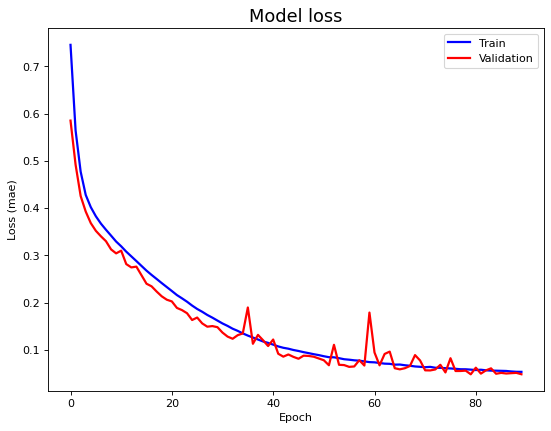

In [23]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [62]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('Final_LSTM_CNN.h5')

In [83]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [84]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[3384    7    2    2]
 [   6 6769  232   15]
 [   3   43 5012   13]
 [   1    9    6 2496]]


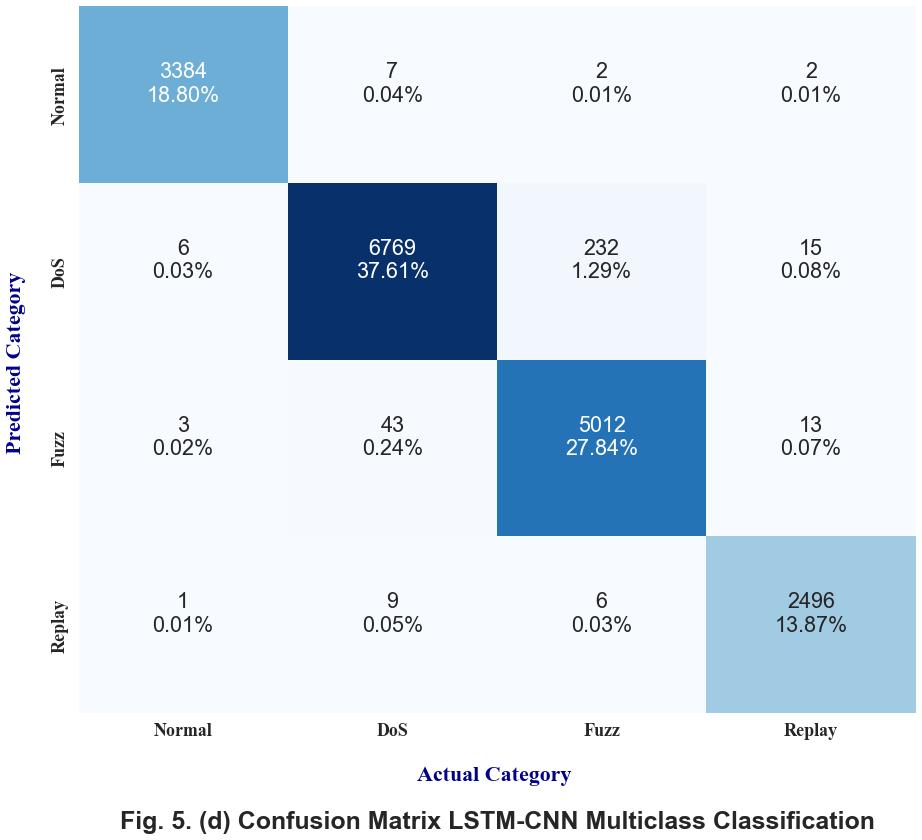

In [85]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(15,13)})
sns.set(font_scale=1.8) #edited as suggested
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)


ax.set_xlabel('\nActual Category ', fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Predicted Category \n', fontname="Times New Roman", size=22,fontweight="bold");
ax.text(0.2, 4.65, 'Fig. 5. (d) Confusion Matrix LSTM-CNN Multiclass Classification',fontsize=25,fontweight="bold")

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.yaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.xaxis.label.set_color('darkblue')
ax.yaxis.label.set_color('darkblue')
## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
from sklearn.metrics import classification_report
class_names = ["Normal", "DoS", "Fuzz", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      3395
         DoS       0.99      0.96      0.98      7022
        Fuzz       0.95      0.99      0.97      5071
      Replay       0.99      0.99      0.99      2512

    accuracy                           0.98     18000
   macro avg       0.98      0.99      0.98     18000
weighted avg       0.98      0.98      0.98     18000



ROC AUC score: 0.9895208901145912


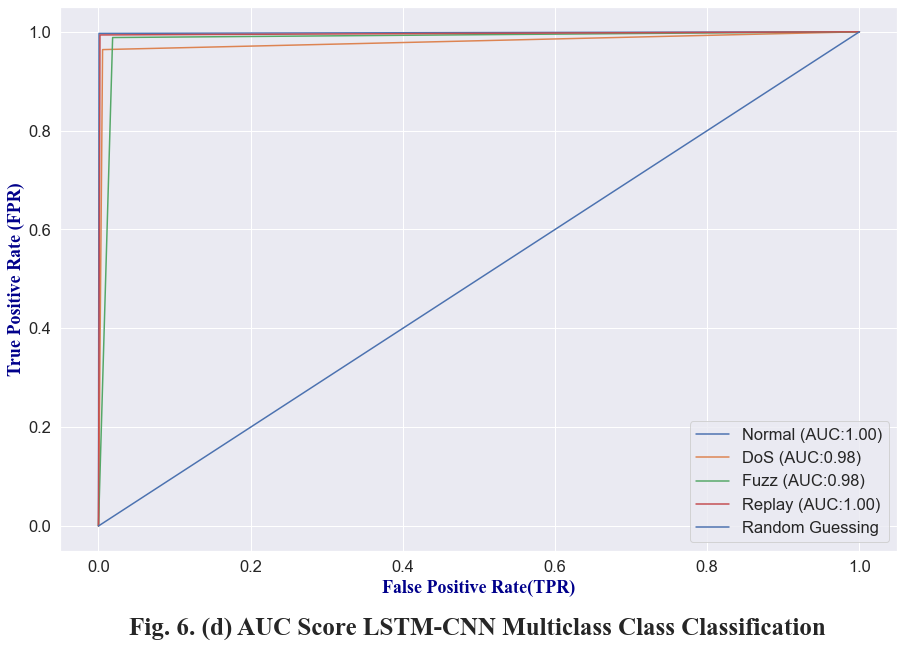

In [115]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "DoS", "Fuzz", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (15, 10))
sns.set(font_scale=1.5) #edited as suggested

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.set_xlabel('False Positive Rate(TPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.set_ylabel('True Positive Rate (FPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.text(0.04, -0.22, 'Fig. 6. (d) AUC Score LSTM-CNN Multiclass Class Classification', fontname="Times New Roman",fontsize=25,fontweight="bold")
c_ax.legend(loc="lower right")

In [145]:
Tesla_Normal_Spec = pd.read_csv("Tesla_Normal_Spec.csv")
Tesla_Fuzz_Spec = pd.read_csv("Tesla_Fuzz_Spec.csv")
Tesla_DoS_Spec = pd.read_csv("Tesla_DoS_Spec.csv")
Tesla_Replay_Spec = pd.read_csv("Tesla_Replay_Spec.csv")



tesla = pd.concat([pd.DataFrame(Tesla_Normal_Spec.values), pd.DataFrame(Tesla_Fuzz_Spec.values), 
                    pd.DataFrame(Tesla_DoS_Spec.values), pd.DataFrame(Tesla_Replay_Spec.values)], 
                   ignore_index=True) 
print(tesla.shape)

(4433, 259)


In [146]:
tesla = np.array(tesla)

In [147]:
X = tesla[:, :258]
y = tesla[:,258]

In [148]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.shape

(4433, 258)

In [149]:
X_trainX = []
y_trainX = []
strat_time = 0
timestamp = 10
length = len(Final)

for i in range(length):
    X_trainX.append(X[strat_time:timestamp, :258])
    y_trainX.append(y[timestamp])
    
    if timestamp >= 4433-10:
        break
    
    strat_time = strat_time + 1
    timestamp = timestamp + 1
print(len(X_trainX))
print(len(y_trainX))

X_trainXX = np.array(X_trainX)
y_trainXX = np.array(y_trainX)

4414
4414


In [150]:
y_trainXX = to_categorical(y_trainX, 4)

In [151]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model_x = load_model('Final_LSTM_CNN.h5')

In [153]:
#Prediction
pred_x = model_x.predict(X_trainXX)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [155]:
from sklearn.metrics import confusion_matrix

y_pred_x = np.argmax(pred_x, axis=1)
# label
y_test_x = np.argmax(y_trainXX, axis=1)
#Get the confusion matrix
cf_matrix_x = confusion_matrix(y_test_, y_pred_)

print(cf_matrix_x)

[[1748  141    0    0]
 [   4 1411   94    0]
 [   0  338  156    0]
 [  23  484   15    0]]


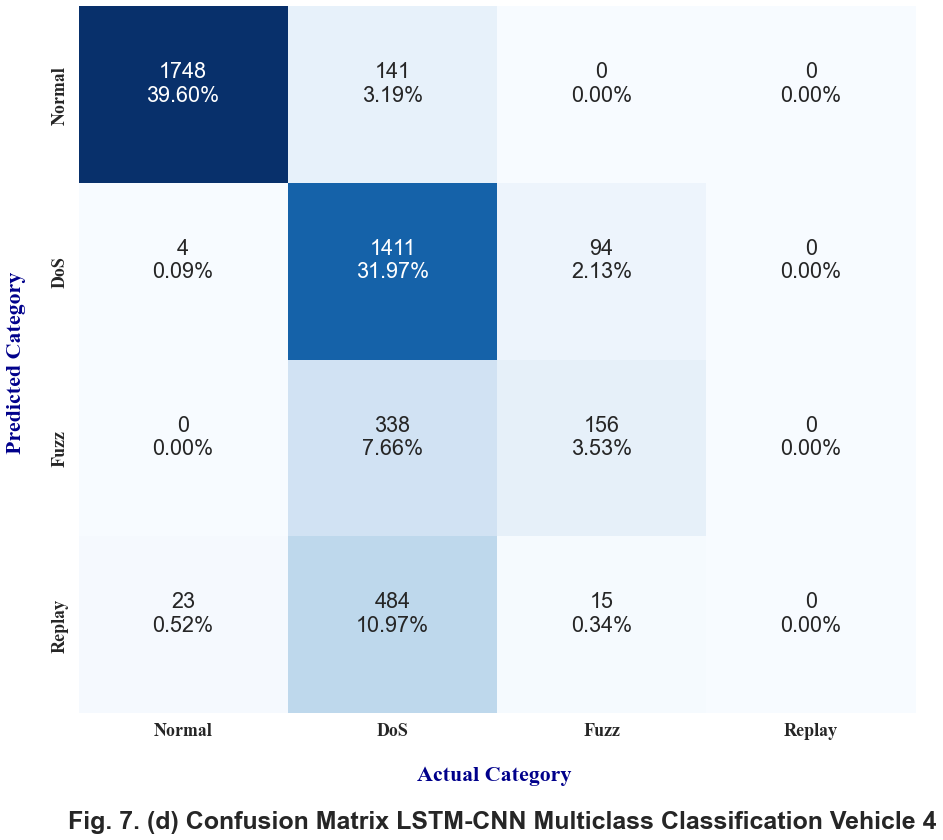

In [164]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_x.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_x.flatten()/np.sum(cf_matrix_x)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)
sns.set(rc={'figure.figsize':(15,13)})
sns.set(font_scale=1.8) #edited as suggested
ax = sns.heatmap(cf_matrix_x, annot=labels, fmt='', cmap='Blues', cbar=False)


ax.set_xlabel('\nActual Category ', fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Predicted Category \n', fontname="Times New Roman", size=22,fontweight="bold");
ax.text(-0.05, 4.65, 'Fig. 7. (d) Confusion Matrix LSTM-CNN Multiclass Classification Vehicle 4',fontsize=25,fontweight="bold")

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.yaxis.set_ticklabels(["Normal", "DoS", "Fuzz", "Replay"],fontweight="bold", fontname="Times New Roman", size=18)
ax.xaxis.label.set_color('darkblue')
ax.yaxis.label.set_color('darkblue')
## Display the visualization of the Confusion Matrix.
plt.show()

In [165]:
from sklearn.metrics import classification_report
class_names = ["Normal", "DoS", "Fuzz", "Replay"]
print(classification_report(y_test_x, y_pred_x, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.98      0.93      0.95      1889
         DoS       0.59      0.94      0.73      1509
        Fuzz       0.59      0.32      0.41       494
      Replay       0.00      0.00      0.00       522

    accuracy                           0.75      4414
   macro avg       0.54      0.54      0.52      4414
weighted avg       0.69      0.75      0.70      4414



C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC score: 0.7257758155375057


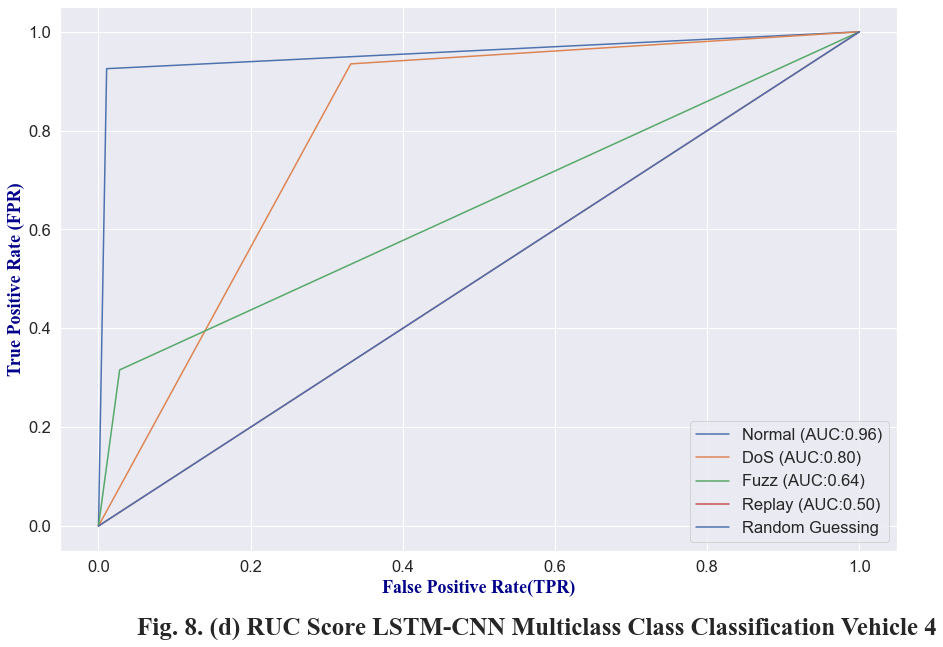

In [167]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["Normal", "DoS", "Fuzz", "Replay"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (15, 10))
sns.set(font_scale=1.5) #edited as suggested

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test_x, y_pred_x, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test_x)
    y_test_x = lb.transform(y_test_x)
    y_pred_x = lb.transform(y_pred_x)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test_x[:,idx].astype(int), y_pred_x[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test_x, y_pred_x, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test_x, y_pred_x))

c_ax.set_xlabel('False Positive Rate(TPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.set_ylabel('True Positive Rate (FPR)', fontname="Times New Roman", size=18, fontweight="bold", color='darkblue')
c_ax.text(0.05, -0.22, 'Fig. 8. (d) RUC Score LSTM-CNN Multiclass Class Classification Vehicle 4', fontname="Times New Roman",fontsize=25,fontweight="bold")
c_ax.legend(loc="lower right")